In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [2]:
df = pd.read_csv("../data/superstore.csv")

In [3]:
df.shape

(51290, 27)

In [4]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [5]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower().str.replace('.', '_')
df.columns

Index(['category', 'city', 'country', 'customer_id', 'customer_name',
       'discount', 'market', '记录数', 'order_date', 'order_id', 'order_priority',
       'product_id', 'product_name', 'profit', 'quantity', 'region', 'row_id',
       'sales', 'segment', 'ship_date', 'ship_mode', 'shipping_cost', 'state',
       'sub_category', 'year', 'market2', 'weeknum'],
      dtype='object')

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [8]:
df[['sales', 'profit', 'quantity']].sum()

sales       1.264290e+07
profit      1.467457e+06
quantity    1.783120e+05
dtype: float64

In [9]:
region_perf = df.groupby('region')[['sales', 'profit']].sum().sort_values('sales', ascending=False)
region_perf

,sales,profit
region,,
Central,2822399,311403.98164
South,1600960,140355.76618
North,1248192,194597.95252
Oceania,1100207,120089.11200
Southeast Asia,884438,17852.32900
North Asia,848349,165578.42100
EMEA,806184,43897.97100
Africa,783776,88871.63100
Central Asia,752839,132480.18700


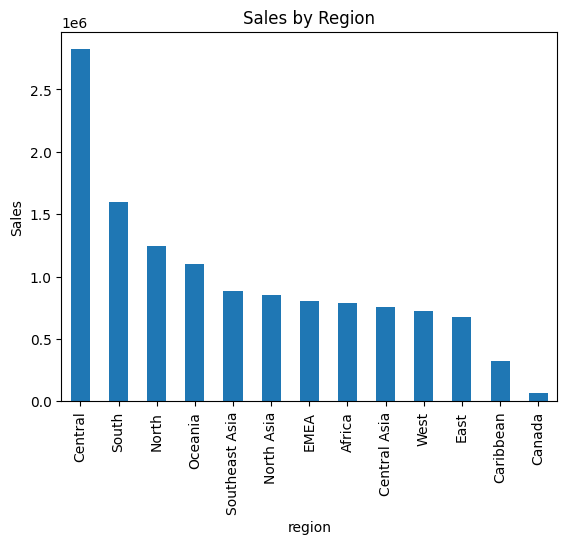

In [10]:
region_perf['sales'].plot(kind='bar', title='Sales by Region')
plt.ylabel('Sales')
plt.show()

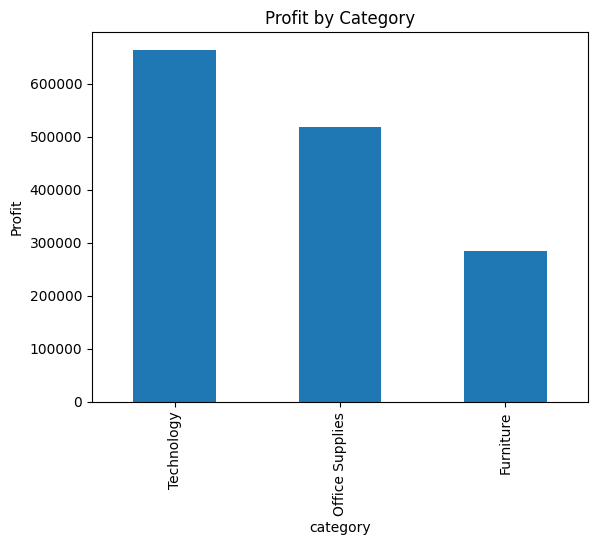

In [11]:
category_perf = df.groupby('category')['profit'].sum().sort_values(ascending=False)

category_perf.plot(kind='bar', title='Profit by Category')
plt.ylabel('Profit')
plt.show()

In [12]:
loss_subcat = df.groupby('sub_category')[['sales','profit']].sum()
loss_subcat[loss_subcat['profit'] < 0].sort_values('profit')

,sales,profit
sub_category,,
Tables,757034,-64083.3887


In [13]:
df_tables = df[df['sub_category'] == 'Tables']

df_tables.groupby('discount')[['sales','profit']].sum().sort_index()

,sales,profit
discount,,
0.00,261807,60447.1997
0.10,3481,795.0270
0.20,157721,7215.5360
0.30,104747,-11960.4786
0.35,54159,-9122.6490
0.40,52162,-17105.1808
0.45,8032,-3596.3026
0.47,32502,-10680.2751
0.50,26505,-15049.8623


In [14]:
df_tables[['shipping_cost','profit']].corr()

,shipping_cost,profit
shipping_cost,1.000000,0.189189
profit,0.189189,1.000000


/tmp/ipykernel_78487/48752468.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_perf = df.resample('M', on='order_date')[['sales','profit']].sum()


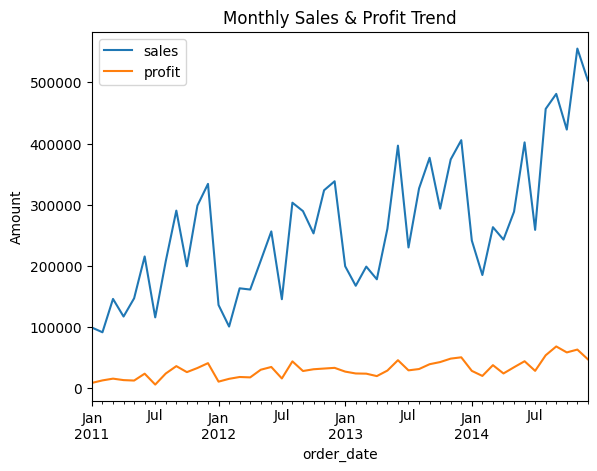

In [15]:
monthly_perf = df.resample('M', on='order_date')[['sales','profit']].sum()

monthly_perf.plot(title='Monthly Sales & Profit Trend')
plt.ylabel('Amount')
plt.show()

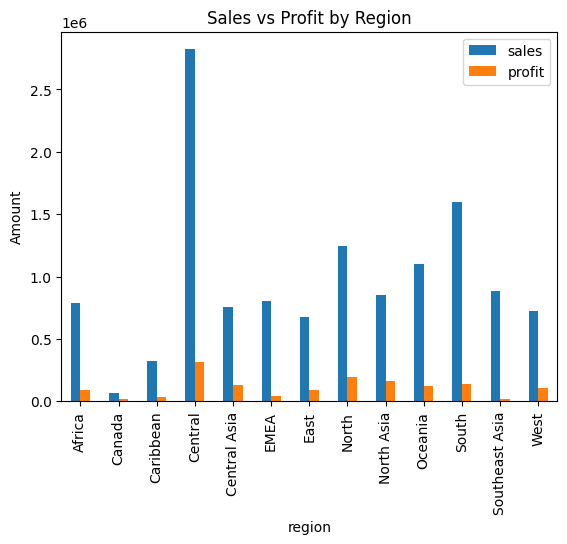

In [16]:
region_perf = df.groupby('region')[['sales','profit']].sum()

region_perf.plot(kind='bar', title='Sales vs Profit by Region')
plt.ylabel('Amount')
plt.show()

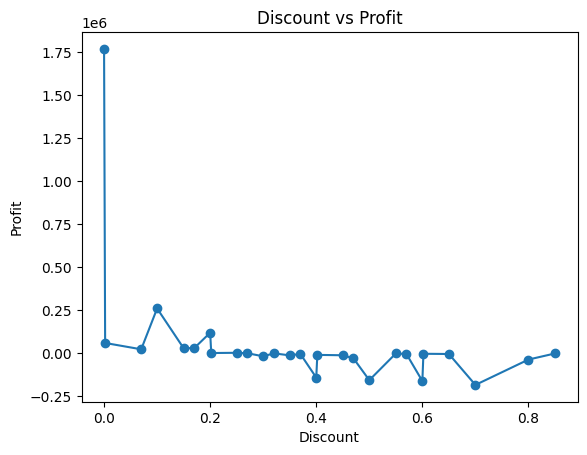

In [17]:
discount_perf = df.groupby('discount')['profit'].sum()

discount_perf.plot(kind='line', marker='o', title='Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

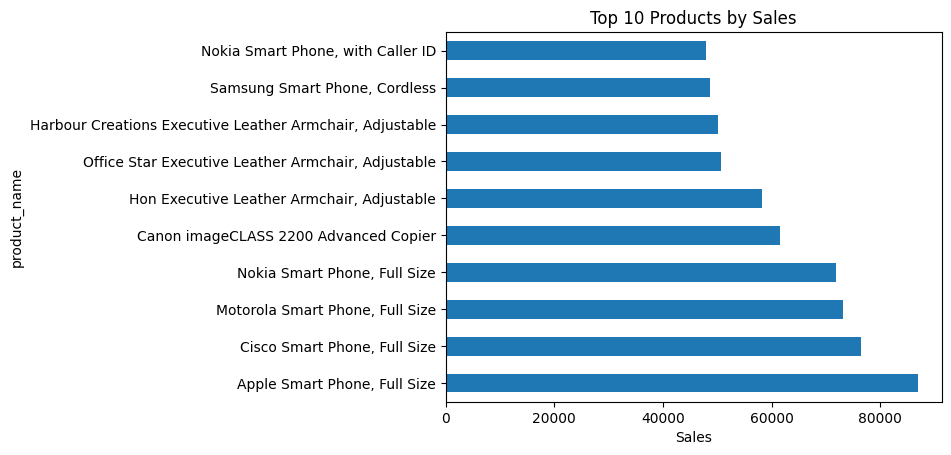

In [18]:
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', title='Top 10 Products by Sales')
plt.xlabel('Sales')
plt.show()

In [19]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
import plotly.express as px

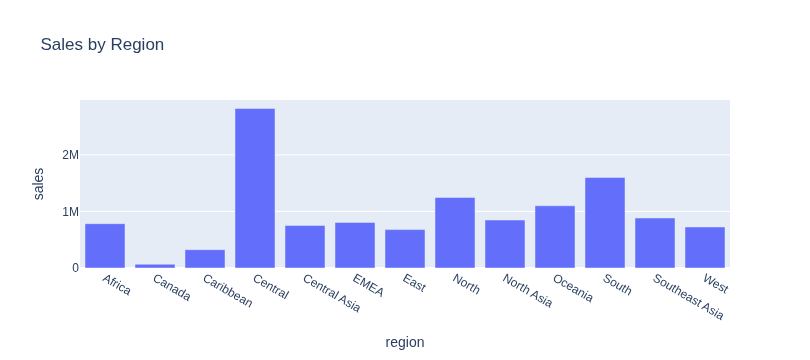

In [21]:
fig = px.bar(
    df.groupby('region', as_index=False)['sales'].sum(),
    x='region',
    y='sales',
    title='Sales by Region'
)
fig.show()

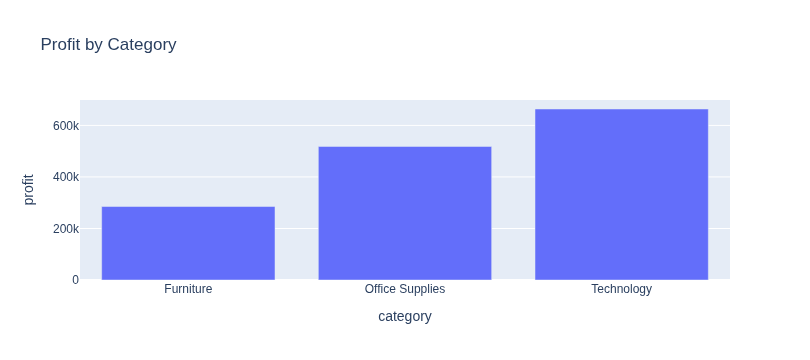

In [22]:
fig = px.bar(
    df.groupby('category', as_index=False)['profit'].sum(),
    x='category',
    y='profit',
    title='Profit by Category'
)
fig.show()

/tmp/ipykernel_78487/2492410842.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



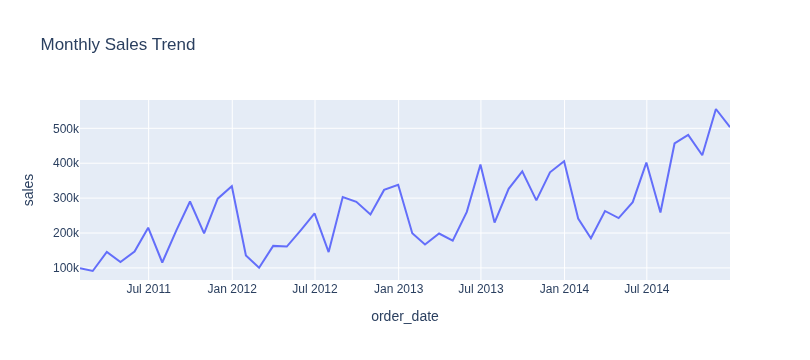

In [23]:
monthly = df.resample('M', on='order_date')['sales'].sum().reset_index()

fig = px.line(
    monthly,
    x='order_date',
    y='sales',
    title='Monthly Sales Trend'
)
fig.show()

In [24]:
pip install dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 2.9 MB/s  0:00:023.0 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [dash]38;5;237m━━━━ 8/9 [dash]]
Note: you may need to restart the kernel to use updated packages.
